In [24]:
# Load libraries
import numpy as np
import pandas as pd
import imblearn
from matplotlib import pyplot as plt
from pandas import read_excel
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


In [25]:
#Load dataset
url = 'Churn_Modelling.xlsx'
dataset = read_excel(url)



In [6]:
# shape
print(dataset.shape)

(10000, 11)


In [26]:
 #types
set_option('display.max_rows', 500)
print(dataset.dtypes)


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [27]:
# head
set_option('display.width', 100)
print(dataset.head(20))


    CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0           619    France  Female   42       2       0.00              1          1   
1           608     Spain  Female   41       1   83807.86              1          0   
2           502    France  Female   42       8  159660.80              3          1   
3           699    France  Female   39       1       0.00              2          0   
4           850     Spain  Female   43       2  125510.82              1          1   
5           645     Spain    Male   44       8  113755.78              2          1   
6           822    France    Male   50       7       0.00              2          1   
7           376   Germany  Female   29       4  115046.74              4          1   
8           501    France    Male   44       4  142051.07              2          0   
9           684    France    Male   27       2  134603.88              1          1   
10          528    France    Male   31     

In [28]:
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())


       CreditScore        Age     Tenure     Balance  NumOfProducts  HasCrCard  IsActiveMember  \
count    10000.000  10000.000  10000.000   10000.000      10000.000  10000.000       10000.000   
mean       650.529     38.922      5.013   76485.889          1.530      0.706           0.515   
std         96.653     10.488      2.892   62397.405          0.582      0.456           0.500   
min        350.000     18.000      0.000       0.000          1.000      0.000           0.000   
25%        584.000     32.000      3.000       0.000          1.000      0.000           0.000   
50%        652.000     37.000      5.000   97198.540          1.000      1.000           1.000   
75%        718.000     44.000      7.000  127644.240          2.000      1.000           1.000   
max        850.000     92.000     10.000  250898.090          4.000      1.000           1.000   

       EstimatedSalary     Exited  
count        10000.000  10000.000  
mean        100090.240      0.204  
std      

In [29]:
#replace empty value with nan
df = dataset.replace(r'^\s+$', np.nan, regex=True)

In [11]:
#check if any value is null in pandas dataframe
df.isnull().values.any()

False

In [30]:
df_new=pd.get_dummies(df[['CreditScore','Age','Tenure','Balance','HasCrCard','Geography','Gender','EstimatedSalary','Exited']])


In [31]:
df_new

,CreditScore,Age,Tenure,Balance,HasCrCard,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,0,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,1,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,1,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,0,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,1,92888.52,1,0,1,0,0,1


array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Exited'}>,
        <AxesSubplot:title={'center':'Geography_France'}>,
        <AxesSubplot:title={'center':'Geography_Germany'}>],
       [<AxesSubplot:title={'center':'Geography_Spain'}>,
        <AxesSubplot:title={'center':'Gender_Female'}>,
        <AxesSubplot:title={'center':'Gender_Male'}>]], dtype=object)

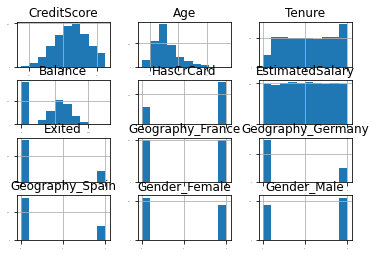

In [32]:
#histograms
df_new.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)

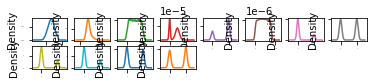

CreditScore         -0.072
Age                  1.011
Tenure               0.011
Balance             -0.141
HasCrCard           -0.902
EstimatedSalary      0.002
Exited               1.472
Geography_France    -0.006
Geography_Germany    1.149
Geography_Spain      1.169
Gender_Female        0.184
Gender_Male         -0.184
dtype: float64


In [33]:
#density
df_new.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
fontsize=1)
pyplot.show()
skew = df_new.skew()
print(skew)


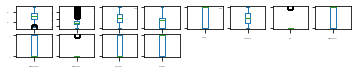

In [34]:
df_new.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False,
fontsize=1)
pyplot.show()


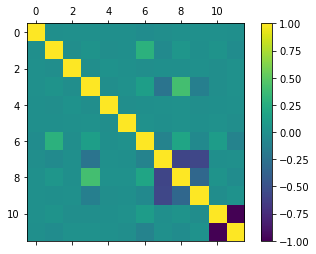

                   CreditScore    Age     Tenure  Balance  HasCrCard  EstimatedSalary  Exited  Geography_France  Geography_Germany  Geography_Spain  \
CreditScore          1.000e+00 -0.004  8.419e-04    0.006     -0.005           -0.001  -0.027            -0.009          5.538e-03            0.005   
Age                 -3.965e-03  1.000 -9.997e-03    0.028     -0.012           -0.007   0.285            -0.039          4.690e-02           -0.002   
Tenure               8.419e-04 -0.010  1.000e+00   -0.012      0.023            0.008  -0.014            -0.003         -5.675e-04            0.004   
Balance              6.268e-03  0.028 -1.225e-02    1.000     -0.015            0.013   0.119            -0.231          4.011e-01           -0.135   
HasCrCard           -5.458e-03 -0.012  2.258e-02   -0.015      1.000           -0.010  -0.007             0.002          1.058e-02           -0.013   
EstimatedSalary     -1.384e-03 -0.007  7.784e-03    0.013     -0.010            1.000   0.012 

In [35]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df_new.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()
set_option('display.width', 150)
set_option('precision', 3)
correlations = df_new.corr(method='pearson')
print(correlations)


In [36]:
# class distribution
print(dataset.groupby('Exited').size())


Exited
0    7963
1    2037
dtype: int64


In [37]:
# instantiating over and under sampler
array = df_new.values
X = array[:,0:11].astype(float)
Y = array[:,11]
over = RandomOverSampler()
under = RandomUnderSampler()
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, Y)
print(f"Oversampled: {Counter(y_over)}")
Oversampled: Counter({0: 9844, 1: 4922})
# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0.0: 5457, 1.0: 5457})
Combined Random Sampling: Counter({0.0: 5457, 1.0: 5457})


In [50]:
# Split-out validation dataset
array = df_new.values
X = X_combined_sampling
Y = y_combined_sampling
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)


In [51]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [52]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [55]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.511394 (0.019606)
LDA: 0.537399 (0.016422)
KNN: 0.511626 (0.011535)
CART: 1.000000 (0.000000)
NB: 0.916620 (0.012830)
SVM: 0.505096 (0.013698)


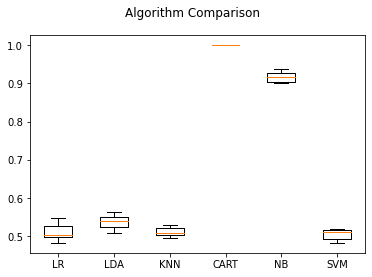

In [57]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


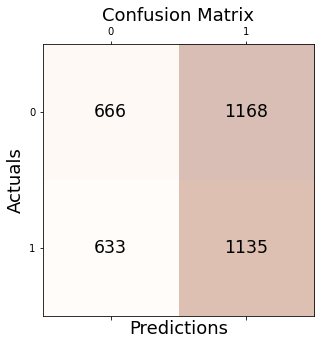

              precision    recall  f1-score   support

         0.0       0.51      0.36      0.43      1834
         1.0       0.49      0.64      0.56      1768

    accuracy                           0.50      3602
   macro avg       0.50      0.50      0.49      3602
weighted avg       0.50      0.50      0.49      3602



In [85]:
#Standardize the dataset
pipelines = []
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    test_size = 0.33
    seed = 7
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    report = classification_report(Y_test, predicted)
    conf_matrix = confusion_matrix(y_true=Y_test, y_pred=predicted)
    #
    # Print the confusion matrix using Matplotlib
    #
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    report = classification_report(Y_test, predicted)
    print(report)
